# Weighted RNN for News-Text Classification

## Importing Required Libraries
**what is preprocessing in case of
image
text,
Numbers and
Audio**
Preprocessing is a crucial step in data analysis and machine learning, as it prepares raw data for further analysis and modeling.
Here's an overview of preprocessing techniques for different types of data:

**1. Image Preprocessing**
Resizing: Adjusting the dimensions of images to a consistent size.

Normalization: Scaling pixel values to a specific range (e.g., 0 to 1).

Data Augmentation: Creating variations of images through rotation, flipping, cropping, etc., to increase the diversity of the training dataset.

Grayscale Conversion: Converting color images to grayscale to reduce complexity.

Noise Reduction: Using filters to remove noise from images.

Edge Detection: Identifying edges within images to highlight important features.

2. Text Preprocessing
Tokenization: Splitting text into individual words or tokens.

Lowercasing: Converting all characters to lowercase to maintain consistency.

Removing Punctuation and Special Characters: Cleaning text by eliminating unnecessary symbols.

Stop Words Removal: Removing common words (e.g., "and," "the") that do not contribute much meaning.

Stemming and Lemmatization: Reducing words to their root form (stemming) or base form (lemmatization).

Vectorization: Converting text into numerical format using techniques like Bag of Words, TF-IDF, or word embeddings.

3. Numerical Data Preprocessing
Normalization/Standardization: Scaling numerical values to a specific range (e.g., 0 to 1) or mean 0 and standard deviation 1.

Missing Value Imputation: Handling missing data by filling in with mean, median, mode, or using more sophisticated techniques.

Outlier Detection and Removal: Identifying and addressing outliers that may skew the data.

Feature Engineering: Creating new features or modifying existing ones to improve model performance.

Discretization/Binning: Converting continuous variables into discrete categories.

4. Audio Preprocessing
Sampling: Converting audio signals to a digital format at a specific sample rate.

Noise Reduction: Removing background noise to enhance the quality of the audio.

Normalization: Adjusting the amplitude of audio signals to a consistent level.

Windowing: Dividing the audio signal into overlapping segments (windows) for analysis.

Feature Extraction: Extracting relevant features like Mel-Frequency Cepstral Coefficients (MFCCs), Spectrograms, or Chroma features.

Silence Removal: Eliminating silent segments from the audio to focus on meaningful parts.



In [ ]:
#<html> Aspect	Supervised Learning                                    	   Unsupervised Learning
#Data	Requires labeled data                                   	                Uses unlabeled data
#Goal	Predict outcomes based on input-output pairs	                           Identify patterns and relationships in data
#Examples	Classification, regression	                                         Clustering, dimensionality reduction
#Advantages	Higher accuracy, easier to interpret	                             No need for labeled data, can discover hidden patterns
#Disadvantages	Needs large labeled datasets, risk of overfitting	             Harder to interpret, may have lower performance for some tasks
#Applications	Image recognition, financial forecasting	                       Customer segmentation, anomaly detection

In [5]:
import os
import sys
import pickle
import keras
import numpy as np
import pandas as pd
import numpy
import matplotlib as plt
%matplotlib inline
import tensorflow as tf
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import common_texts, get_tmpfile

from numpy import loadtxt
from keras.models import load_model
from tensorflow .keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, LSTM,GRU, Embedding, Dropout, Activation ,Permute ,SimpleRNN , Bidirectional ,TimeDistributed, Conv1D ,Activation, Flatten
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import Sequential
from keras import regularizers
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pathlib
import random
import string
import re
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Commented out IPython magic to ensure Python compatibility.
import string
import re
from numpy import array, argmax, random, take
import matplotlib.pyplot as plt
import pandas as pd
import unicodedata
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM, GRU,Activation, RepeatVector, Dropout, Dense, Input,Embedding,Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import regularizers,initializers,constraints
# Final Classification Result as requested is given towards the end

In [6]:
import sys
import os



In [7]:
from keras import backend as K


In [8]:
K.backend()

'tensorflow'

In [9]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

np.random.seed(42)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data = pd.read_csv('/content/drive/MyDrive/Copy of Amharic News Dataset.csv')

data = shuffle(data)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Copy of Amharic News Dataset.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 44810 to 15795
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.7+ MB


In [ ]:
data = data.dropna(subset=['article'])

In [ ]:
data['link'].value_counts()

https://amharic.voanews.com//a/amb-tibor-nagy-in-addis-ababa-on-sudan-06-14-19/4960197.html                                                                                                                                                                                                                                                 3
https://amharic.voanews.com//a/covid-africa/5535902.html                                                                                                                                                                                                                                                                                    3
https://amharic.voanews.com//a/looking-ahead-Ethiopian-renaissance-dam-weaspire-with-voa-alula-kebede-june-2020/5470822.html                                                                                                                                                                                                                

In [ ]:
data.category.unique()

array(['ፖለቲካ', 'ሀገር አቀፍ ዜና', 'ስፖርት', 'ዓለም አቀፍ ዜና', 'ቢዝነስ', 'መዝናኛ', nan],
      dtype=object)

In [ ]:
data['word_len'] = data['article'].str.split().str.len()
data.head()

,headline,category,date,views,article,link,word_len
44810,በመዲናዋ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና ለማስጀመር የ20 ቢሊ...,ፖለቲካ,"September 14, 2017",Unknown,በአዲስ አበባ የተጀመሩ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና አዳዲስ...,https://waltainfo.com/am/29360/,302
18329,አሸንዳ፣ ሻደይ፣ አሸንድዬ፣ ሶለል፣ ማሪያና ዓይኒ ዋሪ በዓል በዩኔስኮ አ...,ሀገር አቀፍ ዜና,"Jan 8, 2020",387,አዲስ አበባ፣ ታህሳስ 29፣ 2012 (ኤፍ.ቢ.ሲ) የአሸንዳ፣ ሻደይ፣ አሸ...,https://www.fanabc.com/%e1%8b%a8%e1%8a%a0%e1%8...,165
17644,ግምታዊ ዋጋቸው ከ31 ነጥብ 6 ሚሊየን ብር በላይ የሆኑ የኮንትሮባንድ ዕ...,ሀገር አቀፍ ዜና,"Mar 4, 2020",634,አዲስ አበባ ፣ የካቲት 25 ፣ 2012 (ኤፍ ቢ ሲ) ባለፉት አምስት ቀና...,https://www.fanabc.com/%e1%8c%8d%e1%88%9d%e1%8...,102
32773,​ባምላክ ተሰማ የዓለም ዋንጫ ለመምራት እጩ ከሆኑ ዳኞች ውስጥ ተካተተ,ስፖርት,"November 19, 2017",Unknown,ሩሲያ በ2018 ለምታስተናግደው የዓለም ዋንጫ ፊፋ ጨዋታዎችን ሊመሩ የሚች...,https://soccerethiopia.net/football/31318,143
4139,“መንገድ ለሰው” መርሐ ግብር በየሳምንቱ እንደሚካሄድ ተገለፀ,ሀገር አቀፍ ዜና,"August 7, 2019",32,አዲስ አበባ፤- “መንገድ ለሰው” በሚል በአዲስ አበባ ከተማ ሲካሄድ የነ...,https://www.press.et/Ama/?p=15606,193


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 44810 to 15795
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
 6   word_len  51483 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [ ]:
data.word_len.mean()

248.9586853912942

In [ ]:
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ
    return rep48


In [ ]:
data['article'] = data['article'].str.replace('[^\w\s]','')

<ipython-input-12-4eb451acb354>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['article'] = data['article'].str.replace('[^\w\s]','')


In [ ]:
data['article'] = data['article'].apply(lambda x: normalize_char_level_missmatch(x))

In [ ]:
n_data = data[['article','category']]
n_data.head()

text,label = data['article'].values,data['category'].values

In [ ]:
a = ['ፖለቲካ', 'ሀገር አቀፍ ዜና', 'ስፖርት', 'ዓለም አቀፍ ዜና', 'ቢዝነስ', 'መዝናኛ']
j=-1
for i in label:
    j=j+1
    if (i not in a):
         print(j)

13788


In [ ]:
data['article'].values[13788]

'\xa0\xa0'

In [ ]:
text[13788]

'\xa0\xa0'

In [ ]:
cat[-1]

'ሀገር አቀፍ ዜና'

In [ ]:
text=list(text)

In [ ]:
label=list(label)

In [ ]:
len(label)

51483

In [ ]:
len(text)

51483

In [ ]:
text.remove(text[13788])

In [ ]:
label.remove(label[13788])

In [ ]:
cat=list(label)

In [ ]:
len(text)

51482

In [ ]:
len(label)

51482

In [ ]:
a = ['ፖለቲካ', 'ሀገር አቀፍ ዜና', 'ስፖርት', 'ዓለም አቀፍ ዜና', 'ቢዝነስ', 'መዝናኛ']

In [ ]:
b = ['politics', 'Country News', 'sport', 'world News', 'business', 'Entertainment']

In [ ]:
unique_label = list(set(label))
Y= []
for i in label:
    Y.append(unique_label.index(i))

In [ ]:
unique_label[0]

'መዝናኛ'

In [ ]:
unique_label

['መዝናኛ', 'ዓለም አቀፍ ዜና', 'ቢዝነስ', 'ፖለቲካ', 'ሀገር አቀፍ ዜና', 'ስፖርት']

In [ ]:
lab= []
for i in label:
    for j in range(0,len(a)):
      if a[j]==i:
          lab.append(b[j])

In [ ]:
len(Y),len(lab)

(51482, 51482)

# New Section

In [ ]:
data=data.drop([13788])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns

In [ ]:
data['category']=lab

In [ ]:
len(data)

51482

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


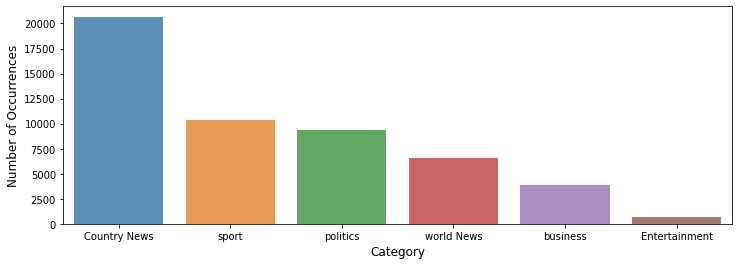

In [ ]:
from pyparsing.core import ExceptionWordUnicode
cnt_pro = data['category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=360)
plt.show();

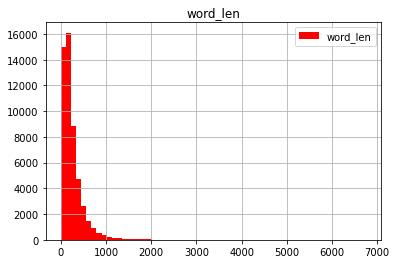

In [ ]:
    cnt_pro = data['word_len']
    length_df = pd.DataFrame({'word_len':cnt_pro})

    length_df.hist(legend=True,bins = 60,color='red' )
    plt.show()

In [ ]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category =data['category'].unique()
print(target_category)
#convert categories
data['CategoryId'] = data['category'].factorize()[0]
data.head()

['politics' 'Country News' 'sport' 'world News' 'business' 'Entertainment']


,headline,category,date,views,article,link,word_len,CategoryId
44810,በመዲናዋ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና ለማስጀመር የ20 ቢሊ...,politics,"September 14, 2017",Unknown,በአዲስ አበባ የተጀመሩ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና አዳዲስ...,https://waltainfo.com/am/29360/,302,0
18329,አሸንዳ፣ ሻደይ፣ አሸንድዬ፣ ሶለል፣ ማሪያና ዓይኒ ዋሪ በዓል በዩኔስኮ አ...,Country News,"Jan 8, 2020",387,አዲስ አበባ ታህሳስ 29 2012 ኤፍቢሲ የአሸንዳ ሻደይ አሸንድዬ ሶለል ...,https://www.fanabc.com/%e1%8b%a8%e1%8a%a0%e1%8...,165,1
17644,ግምታዊ ዋጋቸው ከ31 ነጥብ 6 ሚሊየን ብር በላይ የሆኑ የኮንትሮባንድ ዕ...,Country News,"Mar 4, 2020",634,አዲስ አበባ የካቲት 25 2012 ኤፍ ቢ ሲ ባለፉት አምስት ቀናት ግም...,https://www.fanabc.com/%e1%8c%8d%e1%88%9d%e1%8...,102,1
32773,​ባምላክ ተሰማ የዓለም ዋንጫ ለመምራት እጩ ከሆኑ ዳኞች ውስጥ ተካተተ,sport,"November 19, 2017",Unknown,ሩሲያ በ2018 ለምታስተናግደው የአለም ዋንጫ ፊፋ ጨዋታዎችን ሊመሩ የሚች...,https://soccerethiopia.net/football/31318,143,2
4139,“መንገድ ለሰው” መርሐ ግብር በየሳምንቱ እንደሚካሄድ ተገለፀ,Country News,"August 7, 2019",32,አዲስ አበባ መንገድ ለሰው በሚል በአዲስ አበባ ከተማ ሲካሄድ የነበረው ...,https://www.press.et/Ama/?p=15606,193,1


In [ ]:
dataset=data

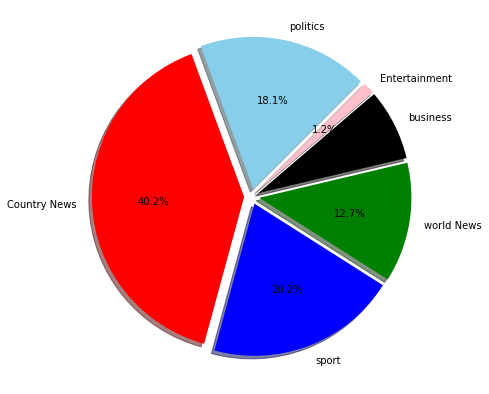

In [ ]:
fig = plt.figure(figsize = (7,7))
colors = ["skyblue","red","blue","green","black","pink"]
politics = dataset[dataset['CategoryId'] == 0 ]
CountryNews = dataset[dataset['CategoryId'] == 1 ]
sport = dataset[dataset['CategoryId'] == 2]
worldNews = dataset[dataset['CategoryId'] == 3]
business = dataset[dataset['CategoryId'] == 4]
entertainment = dataset[dataset['CategoryId'] == 5]
nan = dataset[dataset['CategoryId'] == 6]
count = [politics['CategoryId'].count(), CountryNews['CategoryId'].count(), sport['CategoryId'].count(), worldNews['CategoryId'].count(), business['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['politics', 'Country News', 'sport', 'world News', 'business', 'Entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05,0.05))

In [ ]:
# function to build a tokenizer
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer

def max_length(lang):
  return max(t for t in lang)

def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = pad_sequences(seq, maxlen=length, padding='post')
         return seq











In [ ]:
Amharic_News_tokenizer = tokenization(text)
Amharic_News_vocab=len(Amharic_News_tokenizer.word_index)+1
    #//data_yt=encode_sequences(so_tokenizer,so_length,testso)

    #data_y=np.array(data_y)
    #data_yt=np.array(data_yt)

In [ ]:
Amharic_News_tokenizer.index_word

In [ ]:
Amharic_News_length=len(max_length(text))


In [ ]:
Amharic_News_length

891

In [ ]:
         # integer encode sequences
         seq = Amharic_News_tokenizer.texts_to_sequences(text[0])
         seq


In [ ]:
# pad sequences with 0 values
padding = pad_sequences(seq, maxlen=Amharic_News_length, padding='post')
padding

In [ ]:
data_y=encode_sequences(Amharic_News_tokenizer,Amharic_News_length,text)


In [ ]:
X=data_y

In [ ]:
X

array([[ 126,   10, 3820, ...,    0,    0,    0],
       [  19,   10,  654, ...,    0,    0,    0],
       [  19,   10,  694, ...,    0,    0,    0],
       ...,
       [  21,   48,   83, ...,    0,    0,    0],
       [1728,  433,   88, ...,    0,    0,    0],
       [  19,   10,  748, ...,    0,    0,    0]], dtype=int32)

In [ ]:
N=Y

In [ ]:
Y=np.array(Y,dtype='int32').reshape(1,-1,1)

In [ ]:
Y

array([[[3],
        [4],
        [4],
        ...,
        [4],
        [5],
        [4]]], dtype=int32)

In [ ]:
Y.dtype==X.dtype

True

In [ ]:
Y=Y[0]

In [ ]:
# author - Richard Liao
# Dec 26 2016
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re

from bs4 import BeautifulSoup

import sys
import os



from keras.layers import Dense, Input, Flatten,RepeatVector
# Constants
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping

batch_Size = 128
adam = keras.optimizers.Adam(lr=0.01)
early = EarlyStopping(monitor = 'val_sparse_categorical_accuracy', verbose=1, mode = 'max', patience = 3)


In [ ]:
embedding_layer = Embedding(Amharic_News_vocab,
                            128,
                            input_length=Amharic_News_length,
                            trainable=False)

sequence_input = Input(shape=(Amharic_News_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_cov1= Conv1D(128, 5, activation='relu')(embedded_sequences)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(5)(l_cov2)
l_cov3 = Conv1D(128, 5, activation='relu')(l_pool2)
#l_pool3 = MaxPooling1D(Amharic_News_length)(l_cov3)  # global max pooling
l_flat = Flatten()(l_cov3)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(6, activation='softmax')(l_dense)

model = Model(sequence_input, preds)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("model fitting - simplified convolutional neural network")
model.summary()
model.fit(data_y, Y, validation_split=0.3,
          epochs=10, batch_size=128)

model fitting - simplified convolutional neural network
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 891)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 891, 128)          94461312  
                                                                 
 conv1d_6 (Conv1D)           (None, 887, 128)          82048     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 177, 128)         0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 173, 128)          82048     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 34, 128)          0         
 1D) 

In [ ]:
model.fit(data_y, Y, validation_split=0.3,
          epochs=10, batch_size=128)

Epoch 1/10
282/282 [==============================] - 9s 31ms/step - loss: 0.1646 - acc: 0.9459 - val_loss: 1.1318 - val_acc: 0.7124
Epoch 2/10
282/282 [==============================] - 9s 31ms/step - loss: 0.1380 - acc: 0.9537 - val_loss: 0.9903 - val_acc: 0.7613
Epoch 3/10
282/282 [==============================] - 9s 31ms/step - loss: 0.1210 - acc: 0.9609 - val_loss: 1.0493 - val_acc: 0.7632
Epoch 4/10
282/282 [==============================] - 9s 32ms/step - loss: 0.1117 - acc: 0.9648 - val_loss: 1.0681 - val_acc: 0.7659
Epoch 5/10
282/282 [==============================] - 9s 32ms/step - loss: 0.1000 - acc: 0.9660 - val_loss: 1.3673 - val_acc: 0.7481
Epoch 6/10
282/282 [==============================] - 9s 32ms/step - loss: 0.1025 - acc: 0.9670 - val_loss: 1.1369 - val_acc: 0.7429
Epoch 7/10
282/282 [==============================] - 9s 31ms/step - loss: 0.0829 - acc: 0.9744 - val_loss: 1.6972 - val_acc: 0.7384
Epoch 8/10
282/282 [==============================] - 9s 31ms/step - 

In [ ]:
model.history.history

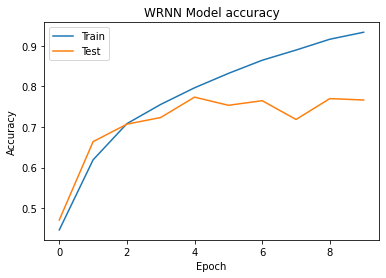

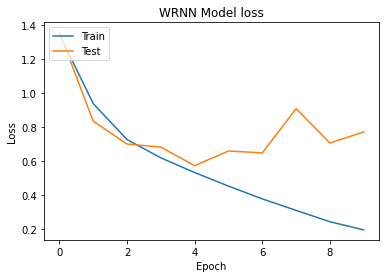

In [ ]:
#Initialize history with correct name of the history (given on top of each model in comments)
#history = modelrnn
# Plot training & validation accuracy values

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('WRNN Model accuracy') #change name accordingly
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('WRNN Model loss') #change name accordingly
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
unique_label

['መዝናኛ', 'ዓለም አቀፍ ዜና', 'ቢዝነስ', 'ፖለቲካ', 'ሀገር አቀፍ ዜና', 'ስፖርት']

In [ ]:
Categories = {0:'መዝናኛ', 1:'ዓለም አቀፍ ዜና', 2:'ቢዝነስ', 3:'ፖለቲካ', 4:'ሀገር አቀፍ ዜና', 5:'ስፖርት'}
#Categories={1: 'ፖለቲካ', 2: 'ሀገር አቀፍ ዜና', 3: 'ስፖርት', 4: 'ዓለም አቀፍ ዜና', 5: 'ቢዝነስ', 6: 'መዝናኛ'}
No_of_Samples = 50
Results = model.predict(data_y[:No_of_Samples])
Predictions=[]
for i in range(No_of_Samples):
    k=[]
    b=Categories.get(Results.argmax(axis=1)[i])
    a=cat[:50][i]
    k.append( Categories.get(Results.argmax(axis=1)[i]))
    k.append(cat[:50][i])
    if(k[0]==k[1]):
        k.append('Correct')
    else:
        k.append('InCorrect')
    Predictions.append(k.copy())
df = pd.DataFrame(Predictions,columns=['Predicted','Actual','Status'])
df

In [ ]:
model.save('/content/drive/MyDrive/yirga/cnnmodel.h5')

In [ ]:
class attention(Layer):
    def init(self):
        super(attention,self).__init__()
    def build(self,input_shape):
        self.W=self.add_weight(name='att_weight',shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name='att_bias',shape=(input_shape[-2],1),initializer="zeros")
        super(attention, self).build(input_shape)
    def call(self,x):
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        return K.sum(output, axis=1)

In [ ]:
## Network architecture
#Model name - modelnn_LSTM, history name - history_LSTM
modelnn_LSTM = Sequential()
modelnn_LSTM.add(Embedding(Amharic_News_vocab,64, input_length=Amharic_News_length))

modelnn_LSTM.add((LSTM(64, dropout=0.2,recurrent_dropout=0.2,return_sequences = True )))  # Creates individual word vectors
modelnn_LSTM.add(Permute((2,1)))
modelnn_LSTM.add(TimeDistributed(Dense(1)))
modelnn_LSTM.add(Flatten()) # Final Document Vector
# Classification
modelnn_LSTM.add(Dense(64,activation='relu'))
modelnn_LSTM.add(Dense(8,activation='softmax',kernel_initializer='he_normal',kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0.01)))

modelnn_LSTM.compile(loss='sparse_categorical_crossentropy',optimizer=adam, metrics=[keras.metrics.sparse_categorical_accuracy])
modelnn_LSTM.summary()
history_LSTM = modelnn_LSTM.fit(data_y,Y, validation_split=0.05,epochs=5 ,batch_size=batch_Size, callbacks= [early])
## Network architecture
#model name - modelnn_BiLSTM, history name - history_BiLSTM
modelnn_BiLSTM = Sequential()
# The LSTM network is changed
modelnn_BiLSTM.add(Bidirectional(LSTM(128, input_shape=(Amharic_News_vocab,Amharic_News_length), dropout=0.2,recurrent_dropout=0.2,return_sequences = True )))  # Creates individual word vectors
modelnn_LSTM.add(Permute((2,1)))
modelnn_BiLSTM.add(TimeDistributed(Dense(1)))
modelnn_BiLSTM.add(Flatten()) # Final Document Vector
# Classification
modelnn_BiLSTM.add(Dense(128,activation='relu'))
modelnn_BiLSTM.add(Dense(20,activation='softmax',kernel_initializer='he_normal',kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0.01)))

modelnn_BiLSTM.compile(loss='categorical_crossentropy',optimizer=adam, metrics=[keras.metrics.categorical_accuracy])
history_BiLSTM = modelnn_BiLSTM.fit(data_y,Y, validation_split=0.05,epochs=100 ,batch_size=batch_Size, callbacks= [early])
modelnn_BiLSTM.summary()

In [ ]:
from keras import backend as K


In [ ]:
'''inp = Input(shape=(Amharic_News_length,))
    x = Embedding(Amharic_News_vocab, 128, trainable=False)(inp)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = attention()(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)'''
embedding_layer = Embedding(Amharic_News_vocab ,
                            128,
                            input_length=Amharic_News_length)

sequence_input = Input(shape=(Amharic_News_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100, return_sequences=True))(embedded_sequences)
att= attention()(l_lstm)
x = Dense(64, activation="relu")(att)

preds = Dense(6, activation='softmax')(x)
model = Model(sequence_input, preds)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("model fitting - Bidirectional LSTM")
model.summary()
model.fit(data_y, Y[0], validation_split=0.3,
          epochs=10, batch_size=50)

model fitting - Bidirectional LSTM
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 891)]             0         
                                                                 
 embedding_15 (Embedding)    (None, 891, 128)          94461312  
                                                                 
 bidirectional_23 (Bidirecti  (None, 891, 200)         183200    
 onal)                                                           
                                                                 
 attention_6 (attention)     (None, 200)               1091      
                                                                 
 dense_7 (Dense)             (None, 64)                12864     
                                                                 
 dense_8 (Dense)             (None, 6)                 390       
                        

KeyboardInterrupt: ignored

In [ ]:
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
    model.fit(data_y, Y[0], validation_split=0.3,
          epochs=10, batch_size=50)

Epoch 1/10
104/721 [===>..........................] - ETA: 38:33 - loss: 1.5228 - acc: 0.3869

KeyboardInterrupt: ignored

In [ ]:
    model = Sequential()
    #model.add(Embedding(input_dim=v, output_dim=300 , input_length=length-1, weights = [embed_matrix], trainable=False))
    model.add(Embedding(Amharic_News_vocab,128, input_length=Amharic_News_length))
    model.add(GRU(128, return_sequences=True))
    model.add(AttentionWithContext())
    #model.add(Dropout(0.5))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
    model.fit(data_y, Y.reshape(Y.shape[0], Y.shape[1], 1), validation_split=0.3,
          epochs=10, batch_size=50)
    model.save('/content/drive/MyDrive/yirga/gruatt.h5')

TypeError: ignored

In [ ]:
    model = Sequential()
    #model.add(Embedding(input_dim=v, output_dim=300 , input_length=length-1, weights = [embed_matrix], trainable=False))
    model.add(Embedding(Amharic_News_vocab,128, input_length=Amharic_News_length))
    model.add(LSTM(128, return_sequences=True))
    model.add(attention())
    #model.add(Dropout(0.5))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
    model.fit(data_y, Y.reshape(Y.shape[0], Y.shape[1], 1), validation_split=0.3,
          epochs=10, batch_size=50)
    model.save('/content/drive/MyDrive/yirga/lstatt.h5')

Epoch 1/10
721/721 [==============================] - 83s 73ms/step - loss: 0.9068 - acc: 0.6620 - val_loss: 0.5891 - val_acc: 0.7826
Epoch 2/10
721/721 [==============================] - 56s 78ms/step - loss: 0.4702 - acc: 0.8419 - val_loss: 0.6377 - val_acc: 0.7905
Epoch 3/10
721/721 [==============================] - 52s 72ms/step - loss: 0.3049 - acc: 0.9029 - val_loss: 0.4586 - val_acc: 0.8390
Epoch 4/10
721/721 [==============================] - 54s 75ms/step - loss: 0.2031 - acc: 0.9387 - val_loss: 0.4957 - val_acc: 0.8298
Epoch 5/10
721/721 [==============================] - 52s 72ms/step - loss: 0.1421 - acc: 0.9586 - val_loss: 0.5254 - val_acc: 0.8286
Epoch 6/10
721/721 [==============================] - 51s 71ms/step - loss: 0.1016 - acc: 0.9706 - val_loss: 0.6509 - val_acc: 0.8167
Epoch 7/10
721/721 [==============================] - 57s 79ms/step - loss: 0.0780 - acc: 0.9766 - val_loss: 0.7192 - val_acc: 0.8160
Epoch 8/10
721/721 [==============================] - 52s 72ms

In [ ]:
    model = Sequential()
    #model.add(Embedding(input_dim=v, output_dim=300 , input_length=length-1, weights = [embed_matrix], trainable=False))
    model.add(Embedding(Amharic_News_vocab,128, input_length=Amharic_News_length))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(attention())
    #model.add(Dropout(0.5))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
    model.fit(data_y, Y.reshape(Y.shape[0], Y.shape[1], 1), validation_split=0.3,
          epochs=10, batch_size=50)
    model.save('/content/drive/MyDrive/yirga/Bilstmatt.h5')

In [ ]:
    model = Sequential()
    #model.add(Embedding(input_dim=v, output_dim=300 , input_length=length-1, weights = [embed_matrix], trainable=False))
    model.add(Embedding(Amharic_News_vocab,128, input_length=Amharic_News_length))
    model.add(Bidirectional(GRU(128, return_sequences=True)))
    model.add(attention())
    #model.add(Dropout(0.5))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
    model.fit(data_y, Y.reshape(Y.shape[0], Y.shape[1], 1), validation_split=0.3,
          epochs=10, batch_size=50)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model.fit(data_y, Y.reshape(Y.shape[0], Y.shape[1], 1), validation_split=0.3,
          epochs=10, batch_size=50)

In [ ]:
model.fit(data_y, Y.reshape(Y.shape[0], Y.shape[1], 1), validation_split=0.3,
          epochs=10, batch_size=50)

Epoch 1/10
721/721 [==============================] - 89s 119ms/step - loss: 0.8499 - acc: 0.6797 - val_loss: 0.5621 - val_acc: 0.7810
Epoch 2/10
721/721 [==============================] - 82s 113ms/step - loss: 0.4328 - acc: 0.8492 - val_loss: 0.4356 - val_acc: 0.8343
Epoch 3/10
721/721 [==============================] - 86s 119ms/step - loss: 0.2691 - acc: 0.9138 - val_loss: 0.4485 - val_acc: 0.8415
Epoch 4/10
721/721 [==============================] - 90s 125ms/step - loss: 0.1682 - acc: 0.9497 - val_loss: 0.5403 - val_acc: 0.8300
Epoch 5/10
721/721 [==============================] - 86s 120ms/step - loss: 0.1132 - acc: 0.9665 - val_loss: 0.6469 - val_acc: 0.8220
Epoch 6/10
721/721 [==============================] - 82s 113ms/step - loss: 0.0810 - acc: 0.9767 - val_loss: 0.6181 - val_acc: 0.8238
Epoch 7/10
721/721 [==============================] - 82s 114ms/step - loss: 0.0615 - acc: 0.9826 - val_loss: 0.6755 - val_acc: 0.8174
Epoch 8/10
721/721 [==============================] - 8

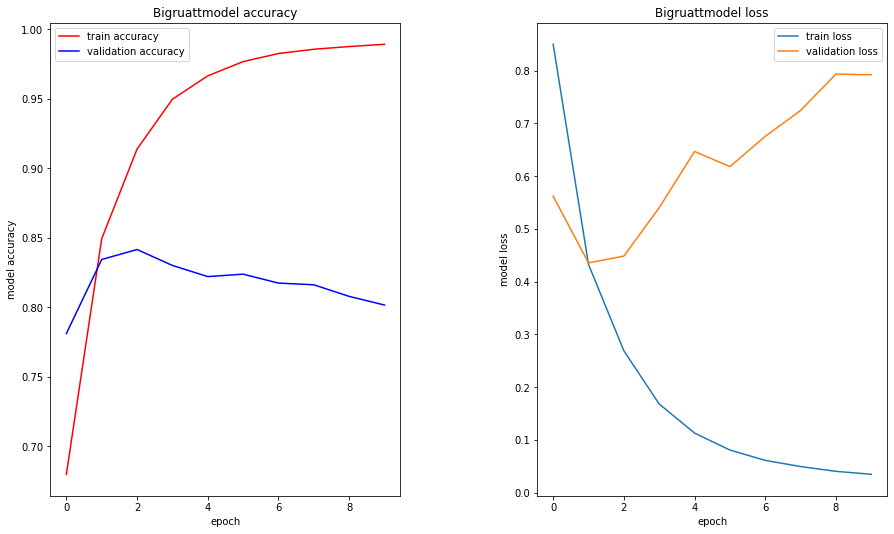

In [ ]:
plothisto(model,"Bigruatt")

In [ ]:
Categories = {0:'መዝናኛ', 1:'ዓለም አቀፍ ዜና', 2:'ቢዝነስ', 3:'ፖለቲካ', 4:'ሀገር አቀፍ ዜና', 5:'ስፖርት'}
#Categories={1: 'ፖለቲካ', 2: 'ሀገር አቀፍ ዜና', 3: 'ስፖርት', 4: 'ዓለም አቀፍ ዜና', 5: 'ቢዝነስ', 6: 'መዝናኛ'}
No_of_Samples = 50
Results = model.predict(data_y[:No_of_Samples])
Predictions=[]
for i in range(No_of_Samples):
    k=[]
    b=Categories.get(Results.argmax(axis=1)[i])
    a=cat[:50][i]
    k.append( Categories.get(Results.argmax(axis=1)[i]))
    k.append(cat[:50][i])
    if(k[0]==k[1]):
        k.append('Correct')
    else:
        k.append('InCorrect')
    Predictions.append(k.copy())
df = pd.DataFrame(Predictions,columns=['Predicted','Actual','Status'])
df

2/2 [==============================] - 1s 44ms/step


,Predicted,Actual,Status
0,ፖለቲካ,ፖለቲካ,Correct
1,ሀገር አቀፍ ዜና,ሀገር አቀፍ ዜና,Correct
2,ሀገር አቀፍ ዜና,ሀገር አቀፍ ዜና,Correct
3,ስፖርት,ስፖርት,Correct
4,ሀገር አቀፍ ዜና,ሀገር አቀፍ ዜና,Correct
5,ፖለቲካ,ፖለቲካ,Correct
6,ስፖርት,ዓለም አቀፍ ዜና,InCorrect
7,ፖለቲካ,ፖለቲካ,Correct
8,ዓለም አቀፍ ዜና,ዓለም አቀፍ ዜና,Correct
9,ስፖርት,ስፖርት,Correct


In [ ]:
model.save('/content/drive/MyDrive/yirga/Bigruatt.h5')

In [ ]:
embedding_layer = Embedding(Amharic_News_vocab ,
                            128,
                            input_length=Amharic_News_length)

sequence_input = Input(shape=(Amharic_News_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(6, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("model fitting - Bidirectional LSTM")
model.summary()
model.fit(data_y, Y, validation_split=0.3,
          epochs=10, batch_size=50)

model fitting - Bidirectional LSTM
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 891)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 891, 128)          94461312  
                                                                 
 bidirectional_11 (Bidirecti  (None, 200)              183200    
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 6)                 1206      
                                                                 
Total params: 94,645,718
Trainable params: 94,645,718
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
721/721 [==============================] - 80s 105ms/step - loss: 0

In [ ]:
model.save('/content/drive/MyDrive/yirga/BILSTM.h5')

In [ ]:
def plothisto(history,name):

    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,10))

    ax[0].plot(history.history.history['acc'],'red')
    ax[0].plot(history.history.history['val_acc'],'blue')
    ax[0].legend(['train accuracy','validation accuracy'])
    ax[0].set_title(name+'model accuracy')

    ax[0].set_ylabel('model accuracy')
    ax[0].set_xlabel('epoch')
    ax[1].plot(history.history.history['loss'])
    ax[1].plot(history.history.history['val_loss'])
    ax[1].legend(['train loss','validation loss'])
    ax[1].set_title(name+'model loss')

    ax[1].set_ylabel('model loss')
    ax[1].set_xlabel('epoch')
    fig.tight_layout(pad=10.0)

    plt.show()

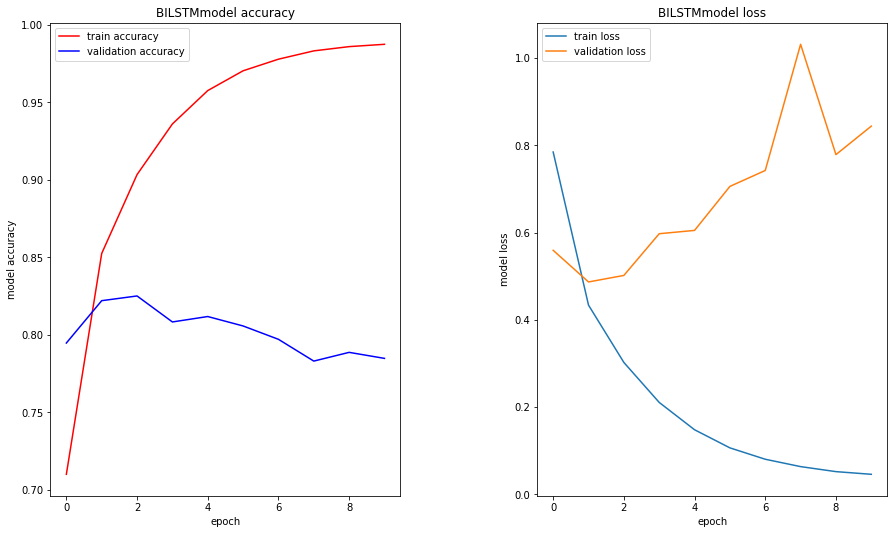

In [ ]:
plothisto(model,"BILSTM")

In [ ]:
plothisto(model,"BILSTM")
Categories = {0:'መዝናኛ', 1:'ዓለም አቀፍ ዜና', 2:'ቢዝነስ', 3:'ፖለቲካ', 4:'ሀገር አቀፍ ዜና', 5:'ስፖርት'}
#Categories={1: 'ፖለቲካ', 2: 'ሀገር አቀፍ ዜና', 3: 'ስፖርት', 4: 'ዓለም አቀፍ ዜና', 5: 'ቢዝነስ', 6: 'መዝናኛ'}
No_of_Samples = 50
Results = model.predict(data_y[:No_of_Samples])
Predictions=[]
for i in range(No_of_Samples):
    k=[]
    b=Categories.get(Results.argmax(axis=1)[i])
    a=cat[:50][i]
    k.append( Categories.get(Results.argmax(axis=1)[i]))
    k.append(cat[:50][i])
    if(k[0]==k[1]):
        k.append('Correct')
    else:
        k.append('InCorrect')
    Predictions.append(k.copy())
df = pd.DataFrame(Predictions,columns=['Predicted','Actual','Status'])
df

2/2 [==============================] - 1s 54ms/step


,Predicted,Actual,Status
0,ፖለቲካ,ፖለቲካ,Correct
1,ሀገር አቀፍ ዜና,ሀገር አቀፍ ዜና,Correct
2,ሀገር አቀፍ ዜና,ሀገር አቀፍ ዜና,Correct
3,ስፖርት,ስፖርት,Correct
4,ሀገር አቀፍ ዜና,ሀገር አቀፍ ዜና,Correct
5,ፖለቲካ,ፖለቲካ,Correct
6,ስፖርት,ዓለም አቀፍ ዜና,InCorrect
7,ፖለቲካ,ፖለቲካ,Correct
8,ዓለም አቀፍ ዜና,ዓለም አቀፍ ዜና,Correct
9,ስፖርት,ስፖርት,Correct


In [ ]:
embedding_layer = Embedding(Amharic_News_vocab ,
                            128,
                            input_length=Amharic_News_length)

sequence_input = Input(shape=(Amharic_News_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(GRU(100))(embedded_sequences)
preds = Dense(6, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("model fitting - Bidirectional LSTM")
model.summary()
model.fit(data_y, Y, validation_split=0.3,
          epochs=10, batch_size=50)

model fitting - Bidirectional LSTM
Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_63 (InputLayer)       [(None, 891)]             0         
                                                                 
 embedding_41 (Embedding)    (None, 891, 128)          94461312  
                                                                 
 bidirectional_61 (Bidirecti  (None, 200)              138000    
 onal)                                                           
                                                                 
 dense_43 (Dense)            (None, 6)                 1206      
                                                                 
Total params: 94,600,518
Trainable params: 94,600,518
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
721/721 [==============================] - 115s 100ms/step - loss:

In [ ]:
Categories = {0:'መዝናኛ', 1:'ዓለም አቀፍ ዜና', 2:'ቢዝነስ', 3:'ፖለቲካ', 4:'ሀገር አቀፍ ዜና', 5:'ስፖርት'}
#Categories={1: 'ፖለቲካ', 2: 'ሀገር አቀፍ ዜና', 3: 'ስፖርት', 4: 'ዓለም አቀፍ ዜና', 5: 'ቢዝነስ', 6: 'መዝናኛ'}
No_of_Samples = 50
Results = model.predict(data_y[:No_of_Samples])
Predictions=[]
for i in range(No_of_Samples):
    k=[]
    b=Categories.get(Results.argmax(axis=1)[i])
    a=cat[:50][i]
    k.append( Categories.get(Results.argmax(axis=1)[i]))
    k.append(cat[:50][i])
    if(k[0]==k[1]):
        k.append('Correct')
    else:
        k.append('InCorrect')
    Predictions.append(k.copy())
df = pd.DataFrame(Predictions,columns=['Predicted','Actual','Status'])
df

2/2 [==============================] - 0s 46ms/step


,Predicted,Actual,Status
0,ፖለቲካ,ፖለቲካ,Correct
1,ሀገር አቀፍ ዜና,ሀገር አቀፍ ዜና,Correct
2,ሀገር አቀፍ ዜና,ሀገር አቀፍ ዜና,Correct
3,ስፖርት,ስፖርት,Correct
4,ሀገር አቀፍ ዜና,ሀገር አቀፍ ዜና,Correct
5,ፖለቲካ,ፖለቲካ,Correct
6,ስፖርት,ዓለም አቀፍ ዜና,InCorrect
7,ፖለቲካ,ፖለቲካ,Correct
8,ዓለም አቀፍ ዜና,ዓለም አቀፍ ዜና,Correct
9,ስፖርት,ስፖርት,Correct


In [ ]:
model.history.history

{}

In [ ]:
plothisto(model,"bigru")


In [ ]:
model.save('/content/drive/MyDrive/yirga/bigru.h5')

In [ ]:
embedding_layer = Embedding(Amharic_News_vocab ,
                            128,
                            input_length=Amharic_News_length)

sequence_input = Input(shape=(Amharic_News_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = GRU(100)(embedded_sequences)
preds = Dense(6, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("model fitting - Bidirectional LSTM")
model.summary()
model.fit(data_y, Y, validation_split=0.3,
          epochs=10, batch_size=50)

In [ ]:
embedding_layer = Embedding(Amharic_News_vocab ,
                            128,
                            input_length=Amharic_News_length)

sequence_input = Input(shape=(Amharic_News_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = GRU(100)(embedded_sequences)
preds = Dense(6, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("model fitting - Bidirectional LSTM")
model.summary()
model.fit(data_y, Y, validation_split=0.3,
          epochs=10, batch_size=50)
model.save('/content/drive/MyDrive/yirga/gru.h5')

model fitting - Bidirectional LSTM
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_64 (InputLayer)       [(None, 891)]             0         
                                                                 
 embedding_42 (Embedding)    (None, 891, 128)          94461312  
                                                                 
 gru_57 (GRU)                (None, 100)               69000     
                                                                 
 dense_44 (Dense)            (None, 6)                 606       
                                                                 
Total params: 94,530,918
Trainable params: 94,530,918
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
721/721 [==============================] - 46s 62ms/step - loss: 1.5116 - acc: 0.4036 - val_loss: 1.5089 - val_acc: 0.4065
Epoch 2/1

In [ ]:
embedding_layer = Embedding(Amharic_News_vocab ,
                            128,
                            input_length=Amharic_News_length)

sequence_input = Input(shape=(Amharic_News_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = LSTM(100)(embedded_sequences)
preds = Dense(6, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("model fitting - Bidirectional LSTM")
model.summary()
model.fit(data_y, Y, validation_split=0.3,
          epochs=10, batch_size=50)
model.save('/content/drive/MyDrive/yirga/lstm.h5')

model fitting - Bidirectional LSTM
Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_65 (InputLayer)       [(None, 891)]             0         
                                                                 
 embedding_43 (Embedding)    (None, 891, 128)          94461312  
                                                                 
 lstm_7 (LSTM)               (None, 100)               91600     
                                                                 
 dense_45 (Dense)            (None, 6)                 606       
                                                                 
Total params: 94,553,518
Trainable params: 94,553,518
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
721/721 [==============================] - 48s 64ms/step - loss: 1.5097 - acc: 0.4036 - val_loss: 1.5052 - val_acc: 0.4054
Epoch 2/1

In [ ]:
'''text_pairs =[]
for i in range(0,len(inp)):
    text_pairs.append((inp[i],targ[i]))
random.shuffle(text_pairs)
num_val_samples = int(0.3 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples : num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples :]

print(f"{len(text_pairs)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")
print(f"{len(test_pairs)} test pairs")

In [ ]:

class AttLayer(Layer):
    def __init__(self, **kwargs):
        self.init = initializations.get('normal')
        #self.input_spec = [InputSpec(ndim=3)]
        super(AttLayer, self).__init__(** kwargs)

    def build(self, input_shape):
        assert len(input_shape)==3
        #self.W = self.init((input_shape[-1],1))
        self.W = self.init((input_shape[-1],))
        #self.input_spec = [InputSpec(shape=input_shape)]
        self.trainable_weights = [self.W]
        super(AttLayer, self).build(input_shape)  # be sure you call this somewhere!

    def call(self, x, mask=None):
        eij = K.tanh(K.dot(x, self.W))

        ai = K.exp(eij)
        weights = ai/K.sum(ai, axis=1).dimshuffle(0,'x')

        weighted_input = x*weights.dimshuffle(0,1,'x')
        return weighted_input.sum(axis=1)

    def get_output_shape_for(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [ ]:
X[0]

## MODELS

### SimpleRNN (Reference Model - I)

In [ ]:
# Constants
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping

batch_Size = 128
adam = keras.optimizers.Adam(lr=0.01)
early = EarlyStopping(monitor = 'val_sparse_categorical_accuracy', verbose=1, mode = 'max', patience = 3)